# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Shaz\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# EDA

In [ ]:
df = pd.read_csv('Fraud.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [ ]:
df.isnull().sum().sort_values()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


<AxesSubplot:xlabel='isFraud', ylabel='count'>

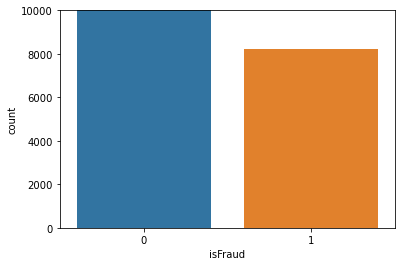

In [ ]:
fig, ax = plt.subplots()
ax.set_ylim(0, 10000)
sns.countplot(data=df, x='isFraud')

## Out of 6362620 data points, only around 8000 are fraud while the rest are not

<AxesSubplot:xlabel='isFlaggedFraud', ylabel='count'>

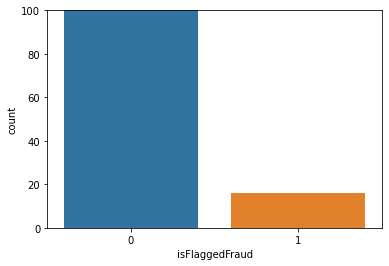

In [ ]:
fig, ax = plt.subplots()
ax.set_ylim(0, 100)
sns.countplot(data=df, x='isFlaggedFraud')

## Out of 6362620 data points, only around 20 were flagged as fraud

In [ ]:
df.corr()['isFraud'].sort_values()

newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
oldbalanceOrg     0.010154
step              0.031578
isFlaggedFraud    0.044109
amount            0.076688
isFraud           1.000000
Name: isFraud, dtype: float64

<AxesSubplot:>

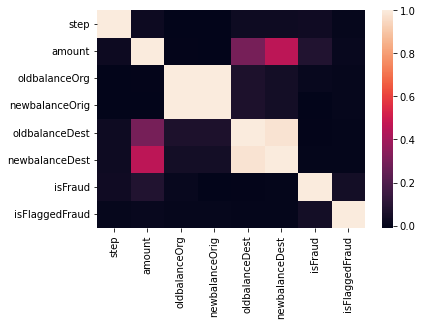

In [ ]:
sns.heatmap(df.corr())

## We find no such multicollinearity among IVs

<AxesSubplot:>

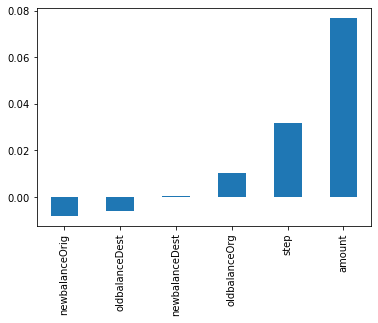

In [ ]:
df.corr()['isFraud'][:-2].sort_values().plot(kind='bar')

## Fraud is mostly correlated with amount and step

<AxesSubplot:xlabel='amount', ylabel='isFraud'>

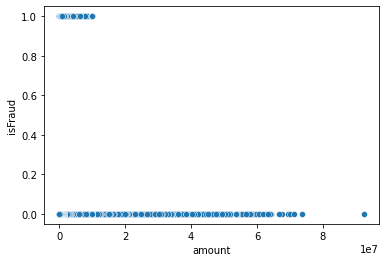

In [ ]:
sns.scatterplot(data=df, x='amount',y='isFraud')

## Fraud only takes place for less amount (< 20 million)

<AxesSubplot:xlabel='step', ylabel='isFraud'>

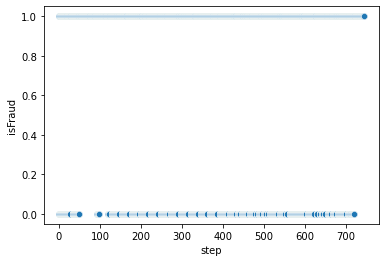

In [ ]:
sns.scatterplot(data=df,x='step',y='isFraud')

## Fraud is associated with higher step count

<Figure size 720x720 with 0 Axes>

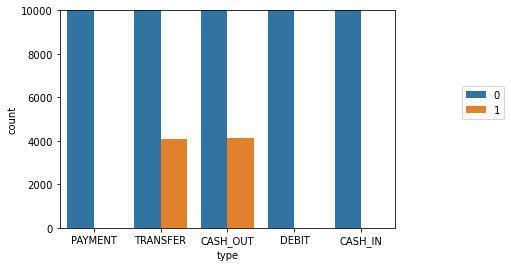

In [ ]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax.set_ylim(0, 10000)
sns.countplot(data=df,x='type',hue='isFraud')
plt.legend(loc=(1.2,0.5))
plt.show()

## Fraud is associated with only two types: transfer and cash_out

<AxesSubplot:xlabel='oldbalanceOrg', ylabel='isFraud'>

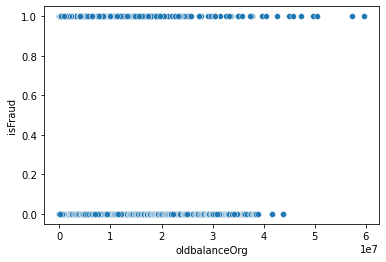

In [ ]:
sns.scatterplot(data=df, x='oldbalanceOrg',y='isFraud')

## Fraud is consistent with oldbalanceOrig

<AxesSubplot:xlabel='newbalanceOrig', ylabel='isFraud'>

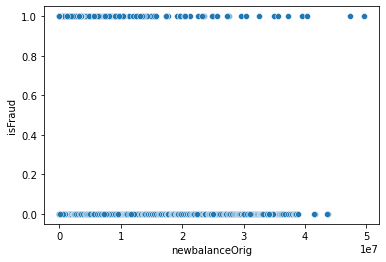

In [ ]:
sns.scatterplot(data=df, x='newbalanceOrig',y='isFraud')


## Fraud is consistent with newbalanceOrig

<AxesSubplot:xlabel='oldbalanceDest', ylabel='isFraud'>

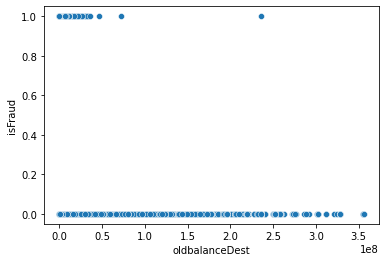

In [ ]:
sns.scatterplot(data=df, x='oldbalanceDest',y='isFraud')


## Fraud is consistent with oldbalanceDest. Though we can see one outlier but its not a worry.

<AxesSubplot:xlabel='newbalanceDest', ylabel='isFraud'>

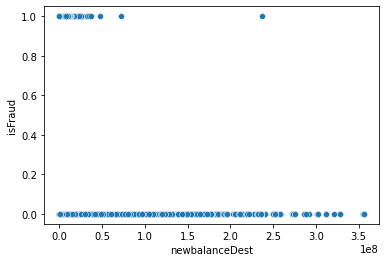

In [ ]:
sns.scatterplot(data=df, x='newbalanceDest',y='isFraud')

## Fraud is consistent with newbalanceDest. Though we can see one outlier but its not a worry.

<AxesSubplot:xlabel='type', ylabel='amount'>

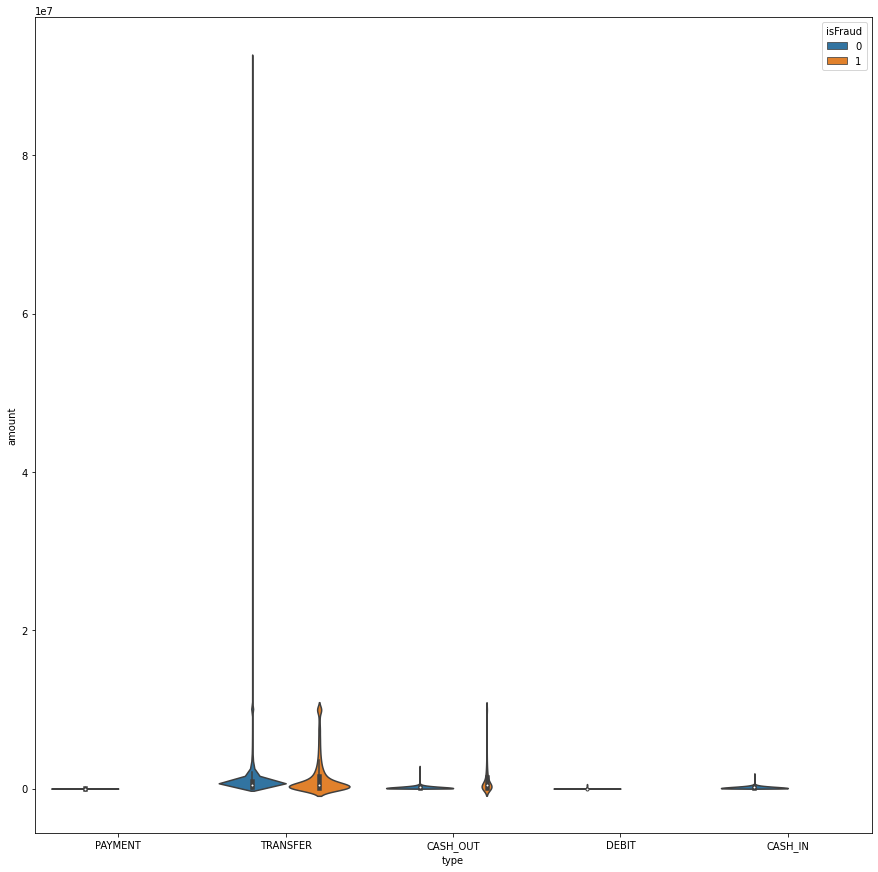

In [ ]:
plt.figure(figsize=(15,15))
sns.violinplot(data=df, x='type', y='amount', hue='isFraud')

## Bigger amounts are ususally transferred and we already know that the fraud is primarily conducted through transfer
## (along with cash_out)

<AxesSubplot:xlabel='type', ylabel='step'>

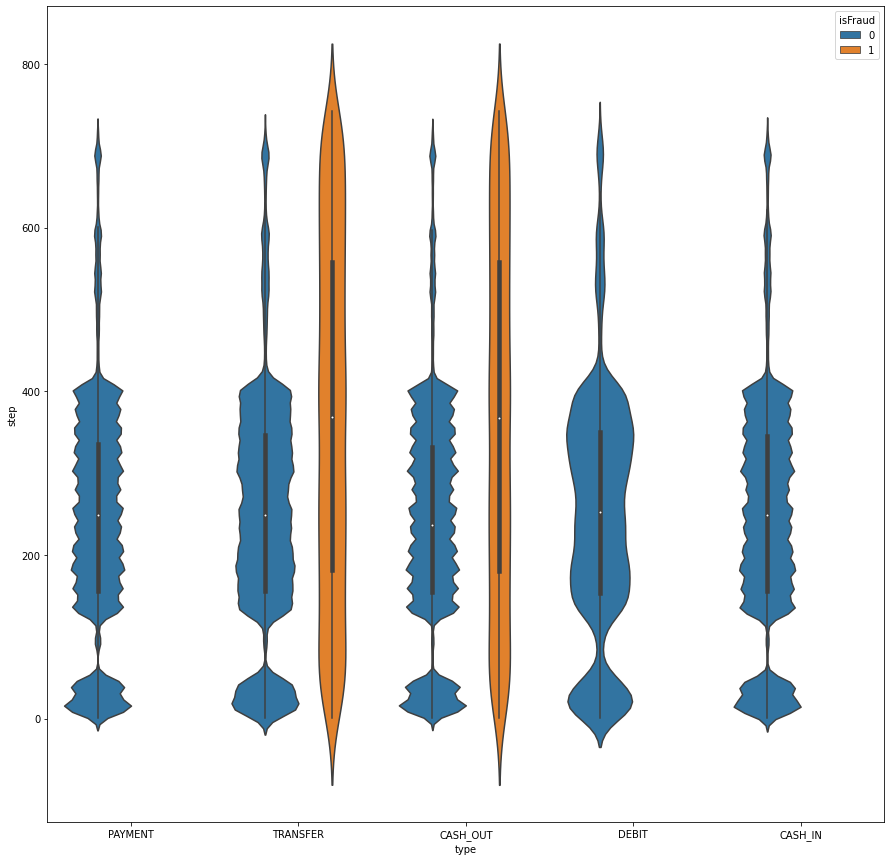

In [ ]:
plt.figure(figsize=(15,15))
sns.violinplot(data=df, x='type', y='step', hue='isFraud')

## We see a uniformity in step v/s type distribution

# Splitting and Scaling

In [ ]:
'''We balance the dataset with equal number of both the categories (0 and 1) i.e. 8000 and 8000. Moreover,
it will reduce the row count making the training of models faster.'''

from sklearn.utils import shuffle

balanced_df_notFraud = df.loc[df['isFraud'] == 0]
balanced_df_notFraud = balanced_df_notFraud.sample(n=8000)

balanced_df_Fraud = df.loc[df['isFraud'] == 1]
balanced_df_Fraud = balanced_df_Fraud.sample(n=8000)

balanced_df = pd.concat([balanced_df_Fraud, balanced_df_notFraud], axis=0)
balanced_df = shuffle(balanced_df)

In [ ]:
## For DVs (X), We remove the Names as they are not tangible features and are supposedly not a marker for fraud

X = balanced_df.drop(['isFraud','isFlaggedFraud','nameOrig','nameDest'], axis=1)
y = balanced_df['isFraud']

In [ ]:
X = pd.get_dummies(X,drop_first=True)

In [ ]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
6235921,594,1592602.27,1592602.27,0.00,561920.93,2154523.20,1,0,0,0
3670119,276,2246118.53,2246118.53,0.00,0.00,0.00,0,0,0,1
6201827,579,3085336.66,3085336.66,0.00,0.00,0.00,0,0,0,1
1793350,162,2934820.94,2934820.94,0.00,0.00,0.00,0,0,0,1
793752,40,15162.36,48848.67,33686.30,0.00,0.00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6308244,685,73110.82,73110.82,0.00,203551.47,276662.29,1,0,0,0
599028,33,1655.16,0.00,0.00,0.00,0.00,0,0,1,0
6259536,601,74854.93,74854.93,0.00,8622604.94,8697459.86,1,0,0,0
240094,14,84667.76,110066.21,25398.45,1048626.12,1379098.84,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Model Selection

We will test 4 different models and see which one performs the best:
1. Support Vector Machine
2. LogisticRegression
3. RandomForest
4. K-Nearest Neighbors

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score

In [ ]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1,10],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [ ]:
grid.best_score_

0.949609375

In [ ]:
grid.best_params_

{'C': 10, 'kernel': 'linear'}

In [ ]:
## We thus train on the best parameter obtained

svc = SVC(kernel='rbf', C=10)
svc.fit(scaled_X_train, y_train)

SVC(C=10)

In [ ]:
pred = svc.predict(scaled_X_test)

accuracy_score(y_test, pred)

0.9459375

C:\Users\Shaz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


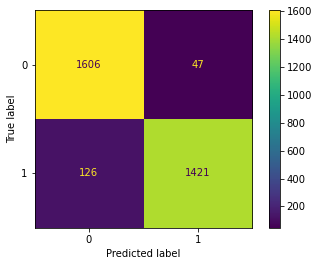

In [ ]:
plot_confusion_matrix(svc,scaled_X_test,y_test)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1653
           1       0.97      0.92      0.94      1547

    accuracy                           0.95      3200
   macro avg       0.95      0.95      0.95      3200
weighted avg       0.95      0.95      0.95      3200



In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
lc = LogisticRegressionCV(cv=5, penalty='elasticnet', solver='saga', l1_ratios=[0.5], max_iter=1000)
lc.fit(scaled_X_train, y_train)

C:\Users\Shaz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Shaz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Shaz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Shaz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Shaz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Shaz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

LogisticRegressionCV(cv=5, l1_ratios=[0.5], max_iter=1000, penalty='elasticnet',
                     solver='saga')

C:\Users\Shaz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


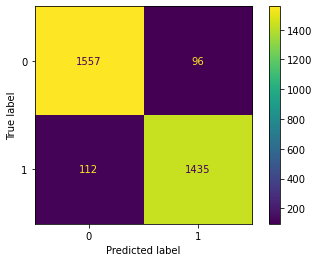

In [ ]:
pred = lc.predict(scaled_X_test)
plot_confusion_matrix(lc,scaled_X_test,y_test)

In [ ]:
accuracy_score(y_test,pred)

0.935

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1653
           1       0.94      0.93      0.93      1547

    accuracy                           0.94      3200
   macro avg       0.94      0.93      0.93      3200
weighted avg       0.94      0.94      0.93      3200



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
## We use GridSearchCV to figure out the optimum parameters

n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)
grid.fit(scaled_X_train,y_train)
grid.best_params_

C:\Users\Shaz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shaz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shaz\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\User

{'bootstrap': False, 'max_features': 4, 'n_estimators': 64, 'oob_score': False}

In [ ]:
## It seems that 18 trees is the optimum solution (computationally) beyond which we see no significant improvement

rfc = RandomForestClassifier(bootstrap = False,
 max_features = 4,
 n_estimators = 64,
 oob_score = False)
rfc.fit(scaled_X_train,y_train)

pred = rfc.predict(scaled_X_test)
accuracy_score(y_test, pred)

0.99375

C:\Users\Shaz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


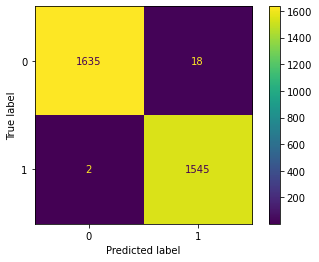

In [ ]:
plot_confusion_matrix(rfc,scaled_X_test,y_test)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1653
           1       0.99      1.00      0.99      1547

    accuracy                           0.99      3200
   macro avg       0.99      0.99      0.99      3200
weighted avg       0.99      0.99      0.99      3200



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Text(0.5, 0, 'K Value')

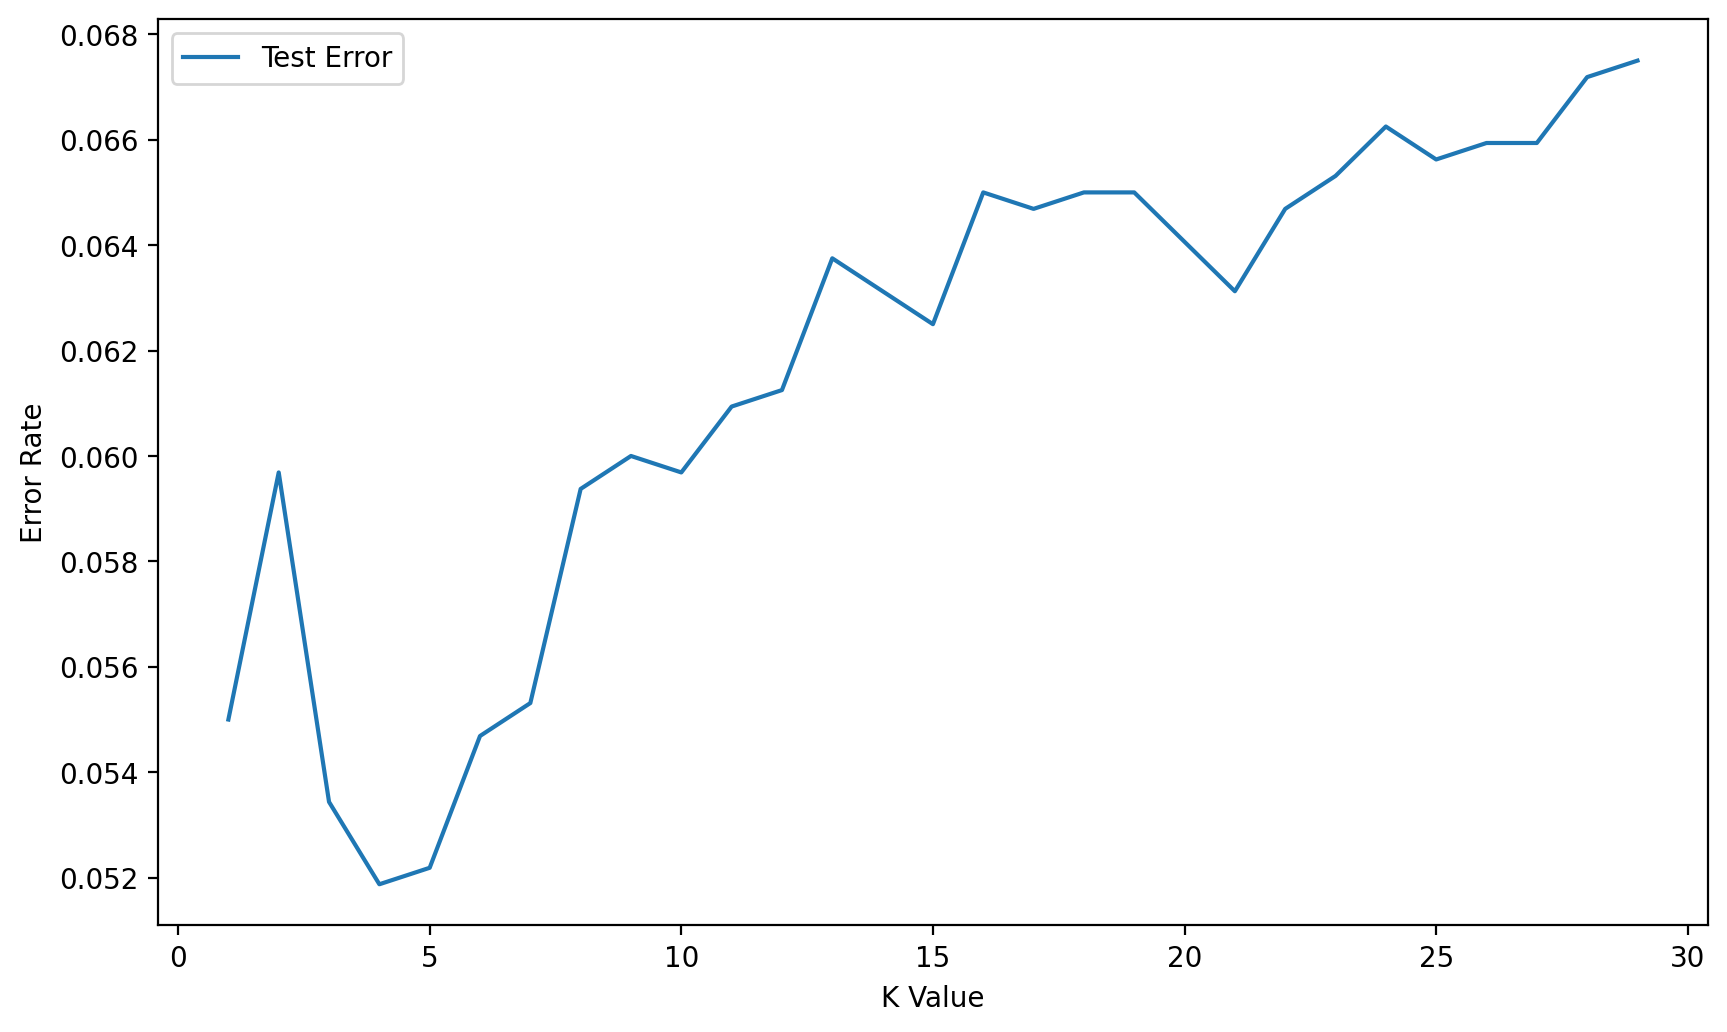

In [ ]:
## Let's figure out the optimum no. of neighbors

test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [ ]:
## It seems 3 is the optimum no. of neighbors

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaled_X_train,y_train)

pred = knn.predict(scaled_X_test)
accuracy_score(y_test,pred)

0.9465625

C:\Users\Shaz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


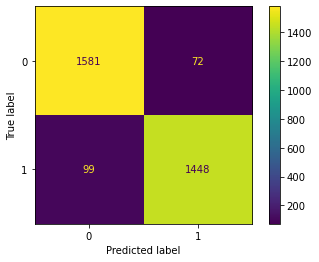

In [ ]:
plot_confusion_matrix(knn,scaled_X_test,y_test)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1653
           1       0.95      0.94      0.94      1547

    accuracy                           0.95      3200
   macro avg       0.95      0.95      0.95      3200
weighted avg       0.95      0.95      0.95      3200



# Deciding Model

In [ ]:
## We finally compare the accuracies of our 4 models and see how they compare side by side:

comparison = pd.DataFrame({'Model':['SVM','LogisticRegression','RandomForest','KNN'],
                           'Accuracy':[svc.score(scaled_X_test,y_test),lc.score(scaled_X_test,y_test),
                                      rfc.score(scaled_X_test,y_test),knn.score(scaled_X_test,y_test)]})
comparison

,Model,Accuracy
0,SVM,0.945937
1,LogisticRegression,0.935000
2,RandomForest,0.993750
3,KNN,0.946562


In [ ]:
svc.score(scaled_X_test,y_test)

0.9459375

In [ ]:
'''RandomForest is the best performing model by accuracy (99%), but it is too good to be true
and there seems to be some issue. Thus, we discard it.

We compare the other 3 models using their ROC-AUC and PRC.

Finally, we use Logistic Regression to figure out the features that affects the fraud mostly'''

'RandomForest is the best performing model by accuracy (99%), but it is too good to be true\nand there seems to be some issue. Thus, we discard it and opt for KNN.\n\nHowever, we use Logistic Regression to figure out the features that affects the fraud mostly'

In [ ]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

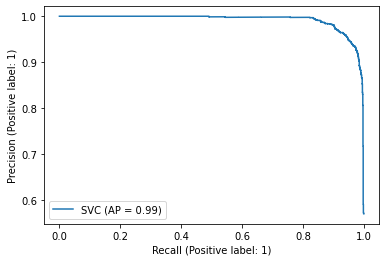

In [ ]:
plot_precision_recall_curve(svc,scaled_X_test,y_test)

C:\Users\Shaz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


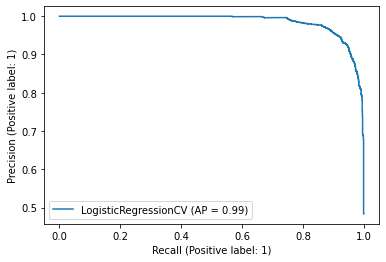

In [ ]:
plot_precision_recall_curve(lc,scaled_X_test,y_test)

C:\Users\Shaz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


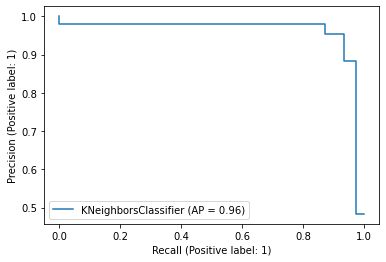

In [ ]:
plot_precision_recall_curve(knn,scaled_X_test,y_test)

C:\Users\Shaz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


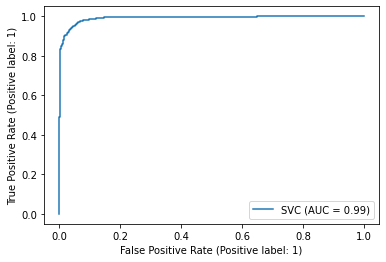

In [ ]:
plot_roc_curve(svc,scaled_X_test,y_test)

C:\Users\Shaz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


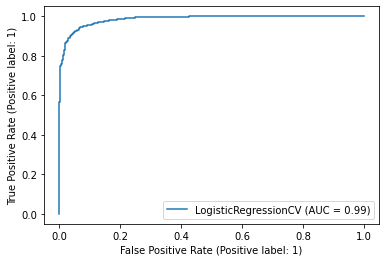

In [ ]:
plot_roc_curve(lc,scaled_X_test,y_test)

C:\Users\Shaz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


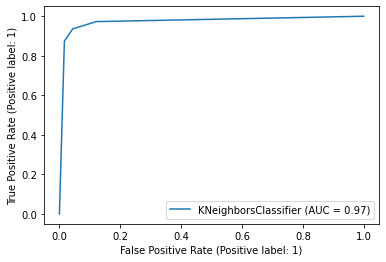

In [ ]:
plot_roc_curve(knn,scaled_X_test,y_test)

In [ ]:
'''SVC and LogisticRegression tend to be better from KNN in terms of their ROC-AUC.
But, we are choosing LogisticRegression because we can plot out the coefficients'''

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'newbalanceOrig'),
  Text(1, 0, 'newbalanceDest'),
  Text(2, 0, 'amount'),
  Text(3, 0, 'type_PAYMENT'),
  Text(4, 0, 'type_DEBIT'),
  Text(5, 0, 'step'),
  Text(6, 0, 'type_CASH_OUT'),
  Text(7, 0, 'type_TRANSFER'),
  Text(8, 0, 'oldbalanceDest'),
  Text(9, 0, 'oldbalanceOrg')])

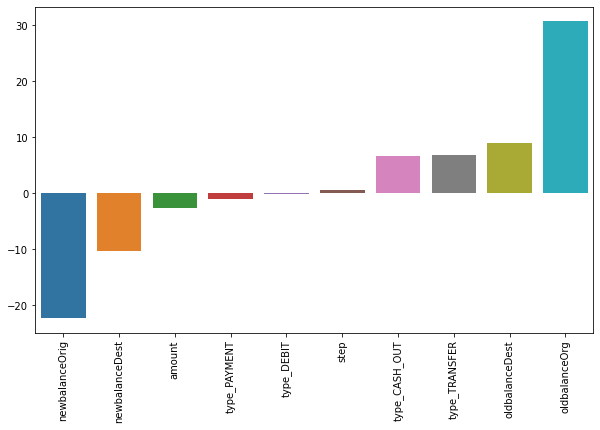

In [ ]:
## We report the features affecting the fraud in order:

coefs = pd.Series(index=X.columns,data=lc.coef_[0])
coefs = coefs.sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values)
plt.xticks(rotation=90)

# Conclusions

In [ ]:
'''
We can see that the 4 significant features responsible for Fraud are in the order:

1. oldbalanceOrig
2. oldbalanceDest
3. type_Transfer
4. type_cash_out

'''

'\nWe can see that the 4 significant features responsible for Fraud are in the order:\n\n1. oldbalanceOrig\n2. oldbalanceDest\n3. type_Transfer\n4. type_cash_out\n\n'

In [ ]:
'''
According to the analysis, the company should be wary about the oldbalanceOrig (i.e. the initial balance before the transaction)
specifically for the transactions pertaining to the types 'Transfer' and 'CashOut'

We can visualize them as:

'''

<AxesSubplot:xlabel='oldbalanceOrg', ylabel='type'>

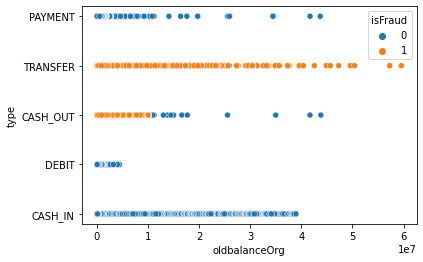

In [ ]:
sns.scatterplot(data=df, x='oldbalanceOrg',y='type',hue='isFraud')

In [ ]:
'''From the above scatterplot, it can be visualized that all the amounts of oldbalanceOrig through 'Transfer' should be
considered for flagging

But only the lesser amount (< 10 million) should be considered for flagging in case of 'Cash_Out'
'''

<AxesSubplot:xlabel='oldbalanceDest', ylabel='type'>

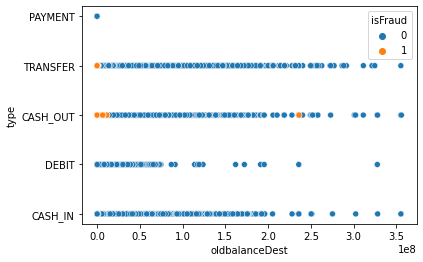

In [ ]:
sns.scatterplot(data=df, x='oldbalanceDest',y='type',hue='isFraud')

In [ ]:
'''
For the OldbalanceDest, only the lesser amount of transfer and cash_out (< 20 million) should be considered for flagging.
However , there seems to be an outlier in case of Cash_out, but we can't do much about such exceptions.

'''

<AxesSubplot:xlabel='oldbalanceOrg', ylabel='step'>

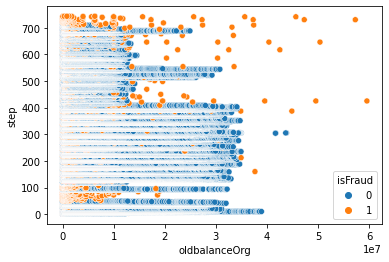

In [ ]:
sns.scatterplot(data=df, x='oldbalanceOrg',y='step',hue='isFraud')

'''
We can't make similar inference about the steps v/s oldbalanceOrig as its clear from the visualization (The fraud is
uniformly distributed across all the step):

'''

<AxesSubplot:xlabel='oldbalanceDest', ylabel='step'>

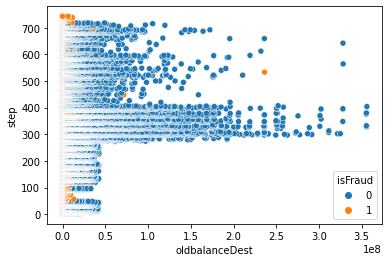

In [ ]:
sns.scatterplot(data=df, x='oldbalanceDest',y='step',hue='isFraud')

<AxesSubplot:xlabel='oldbalanceDest', ylabel='oldbalanceOrg'>

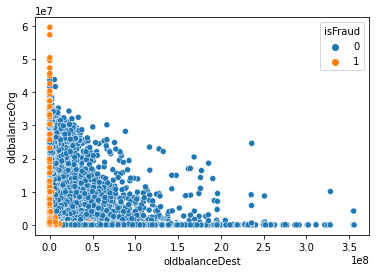

In [ ]:
sns.scatterplot(data=df, x='oldbalanceDest',y='oldbalanceOrg',hue='isFraud')

'''
One final thing we can notice is that we should consider flagging the lesser amounts (<20 million) of the oldbalanceDest
while checking the corresponding oldbalanceOrg for all the amounts.

'''

In [ ]:
'''
   To determine if the relevant actions have been effective in preventing fraudulent transactions,
   we can use the following approaches:

1. Retrain the model: We can retrain our machine learning model on the updated dataset and evaluate its performance.
   If the performance metrics such as accuracy, precision, recall, and F1-score improve, it indicates that the relevant actions
   have been effective in preventing fraudulent transactions.

2. Monitor the data: We can monitor the data to see if the rate of fraudulent transactions has decreased. If the rate of
   fraudulent transactions decreases after implementing the relevant actions, it indicates that the actions have been effective.

3. Use a holdout dataset: We can use a holdout dataset that is not used for training the model and test the model on that
   dataset after implementing the relevant actions. If the performance metrics on the holdout dataset improve, it indicates
   that the actions have been effective.

4. Conduct A/B testing: We can randomly assign a group of customers to the control group and another group to the test group.
   The control group will not have the relevant actions implemented, while the test group will have the actions implemented.
   We can compare the rate of fraudulent transactions between the two groups to see if the relevant actions have been effective.

'''